## Hands-on 3B

#### Build a Decision Tree classifier to predict the survivality of the Titanic passengers based on the data pre-processed in Hands-on 2C.

In [1]:
# Initialization
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Import libraries
from pandas import read_csv
from sklearn.model_selection import train_test_split as split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

To do: 
- Store the features as variable X and targets as variable y
- Split the features and targets into training and testing sets

In [3]:
df = read_csv('titanic_processed.csv')
y = df['Survived'].values
del df['Survived']
X = df.values

X_train, X_test, y_train, y_test = split(X, y, random_state=42)

To do:
- Evaluate the performance of decision tree classifier on this dataset (using the default hyperparameter values)

In [4]:
dtc1 = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print(f'dtc2 accuracy: {dtc1.score(X_test, y_test):.2%}')

dtc2 accuracy: 74.89%


To do: 
- Use grid search to fine tune the following hyperparameters
    * criterion ('gini' or 'entropy')
    * max_leaf_nodes (from 2 to 20)

In [5]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
params = {'criterion': ['gini', 'entropy'], 'max_leaf_nodes':range(2, 21)}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=kf, n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_params_)

{'criterion': 'entropy', 'max_leaf_nodes': 7}


To do:
- Train a decision tree classifier with the best set of hyperparameter values
- Evaluate the performance of the resulting classifier

In [6]:
dtc2 = DecisionTreeClassifier(random_state=42, **gs.best_params_).fit(X_train, y_train)
print(f'dtc2 accuracy: {dtc2.score(X_test, y_test):.2%}')

dtc2 accuracy: 80.27%


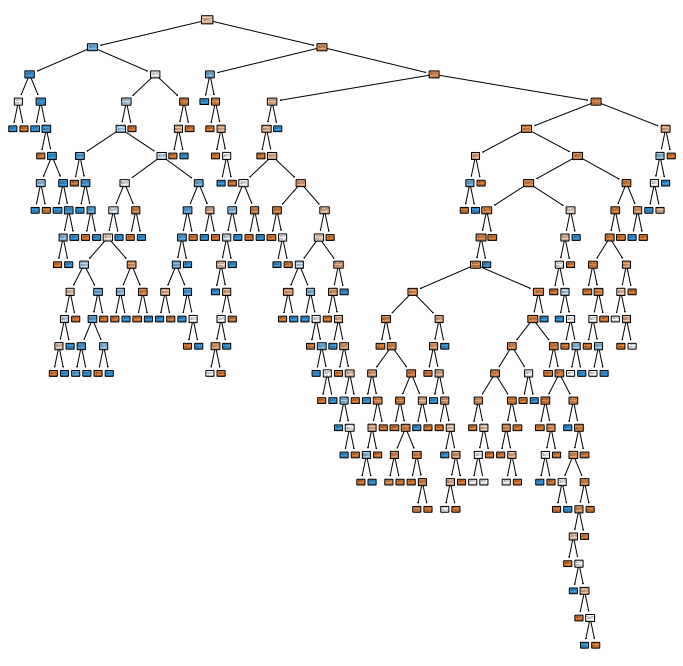

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plot_tree(dtc1, feature_names=df.columns, class_names=['0', '1'], rounded=True, filled=True)
plt.show()

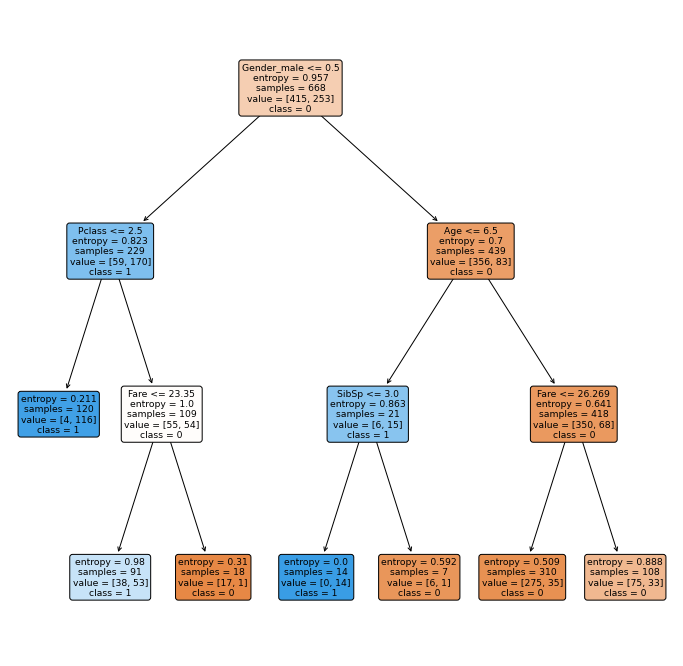

In [11]:
plt.figure(figsize=(12, 12))
plot_tree(dtc2, feature_names=df.columns, class_names=['0', '1'], rounded=True, filled=True)
plt.show()